Parámetros óptimos: gamma = 0.7492207005373783, L = 0.6952083429184029


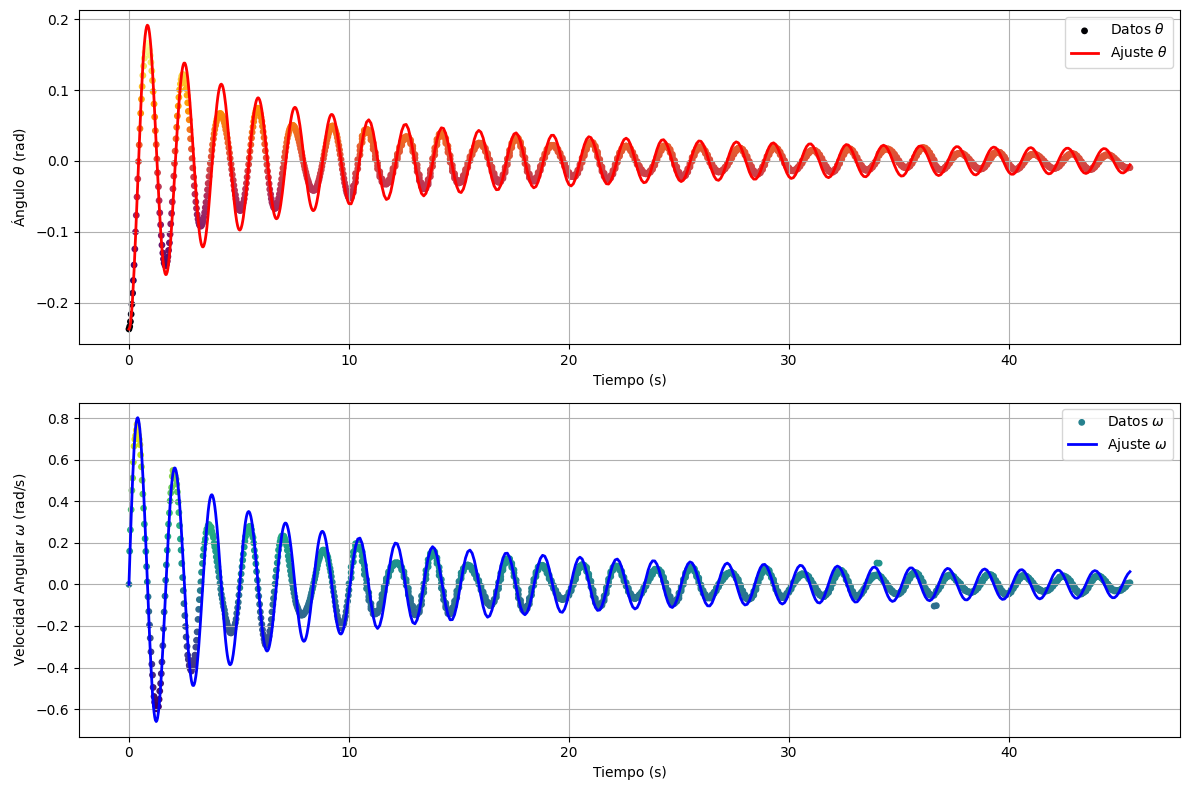

In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd


agua = pd.read_csv(rf"C:\Users\victo\iCloudDrive\Universidad\Informes de Fisica experimental\Semestre 4\Mecanica\Final\dataframe\Agua1.csv", delimiter=";")
agua.replace([np.inf, -np.inf], np.nan, inplace=True)
agua.dropna(inplace=True)

agua[["theta1", "theta2", "theta3"]] = agua[["theta1", "theta2", "theta3"]] * (np.pi / 180)
agua[["omega1", "omega2", "omega3"]] = agua[["omega1", "omega2", "omega3"]] * (np.pi / 180)


g = 9.82


time_data = np.array(agua['t1'])
theta_data = np.array(agua['theta1'])
omega_data = np.array(agua['omega1'])


def model(y, t, gamma, L):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - np.sign(omega) * gamma * np.abs(omega)**2 - (g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

def ECS(params):
    gamma, L = params
    y0 = [theta_data[0], omega_data[0]] 
    solution = odeint(model, y0, time_data, args=(gamma, L))
    theta_model, omega_model = solution[:, 0], solution[:, 1]
    error = np.sum((theta_data - theta_model)**2 + (omega_data - omega_model)**2)
    return error


guess = [0.7, 0.80]  
result = minimize(ECS, guess, bounds=[(0, 10), (0.1, 10)])  
gamma_opt, L_opt = result.x  

print(f"Parámetros óptimos: gamma = {gamma_opt}, L = {L_opt}")

y0 = [theta_data[0], omega_data[0]]
solution_opt = odeint(model, y0, time_data, args=(gamma_opt, L_opt))


plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.scatter(time_data, theta_data, c=theta_data, cmap='inferno', label='Datos $\\theta$', s=15)
plt.plot(time_data, solution_opt[:, 0], color='r', label='Ajuste $\\theta$', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo $\\theta$ (rad)')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.scatter(time_data, omega_data, c=omega_data, cmap='viridis', label='Datos $\\omega$', s=15)
plt.plot(time_data, solution_opt[:, 1], color='b', label='Ajuste $\\omega$', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular $\\omega$ (rad/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Angulo 2

Parámetros óptimos: gamma = 0.7964718621753176, L = 0.6999688324271189


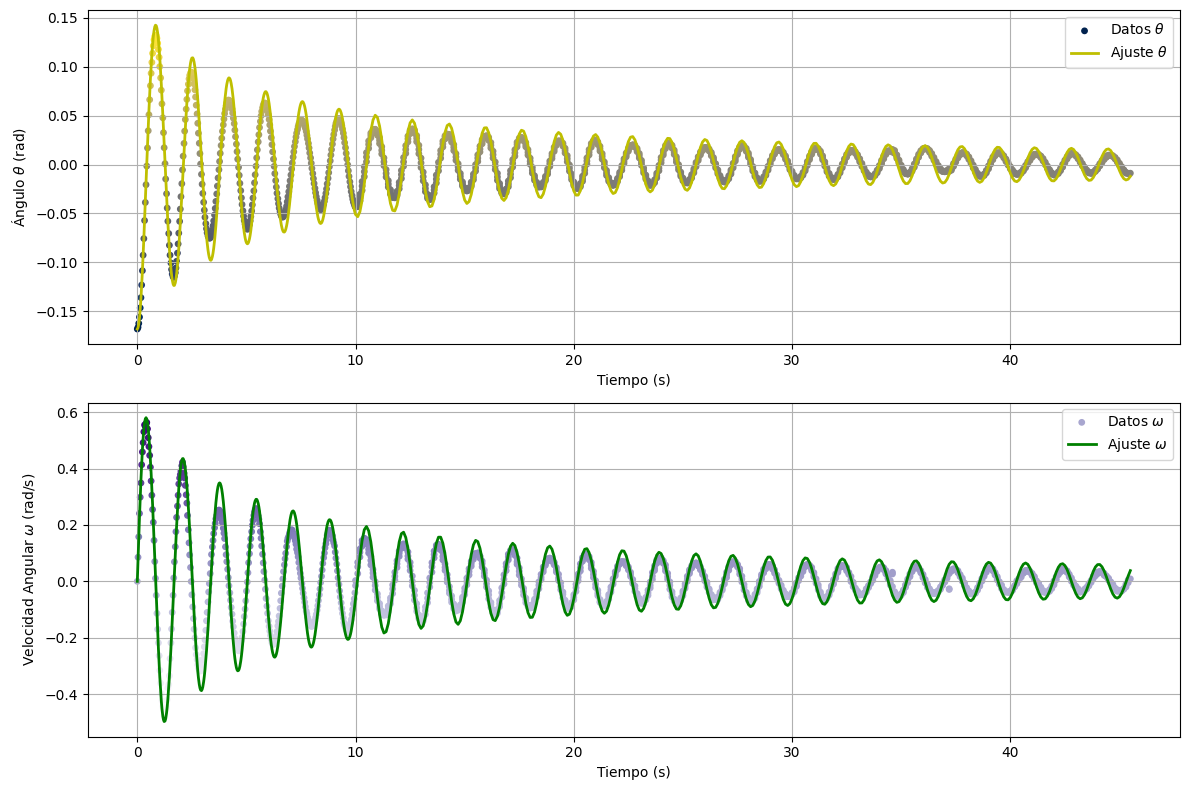

In [8]:
time_data = np.array(agua['t2'])
theta_data = np.array(agua['theta2'])
omega_data = np.array(agua['omega2'])

guess = [0.72, 0.7]  
result = minimize(ECS, guess, bounds=[(0, 10), (0.1, 10)])  
gamma_opt, L_opt = result.x  

print(f"Parámetros óptimos: gamma = {gamma_opt}, L = {L_opt}")

y0 = [theta_data[0], omega_data[0]]
solution_opt = odeint(model, y0, time_data, args=(gamma_opt, L_opt))


plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.scatter(time_data, theta_data, c=theta_data, cmap='cividis', label='Datos $\\theta$', s=15)
plt.plot(time_data, solution_opt[:, 0], color='y', label='Ajuste $\\theta$', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo $\\theta$ (rad)')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.scatter(time_data, omega_data, c=omega_data, cmap='Purples', label='Datos $\\omega$', s=15)
plt.plot(time_data, solution_opt[:, 1], color='g', label='Ajuste $\\omega$', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular $\\omega$ (rad/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Parámetros óptimos: gamma = 0.8014612345198329, L = 0.7019459652506029


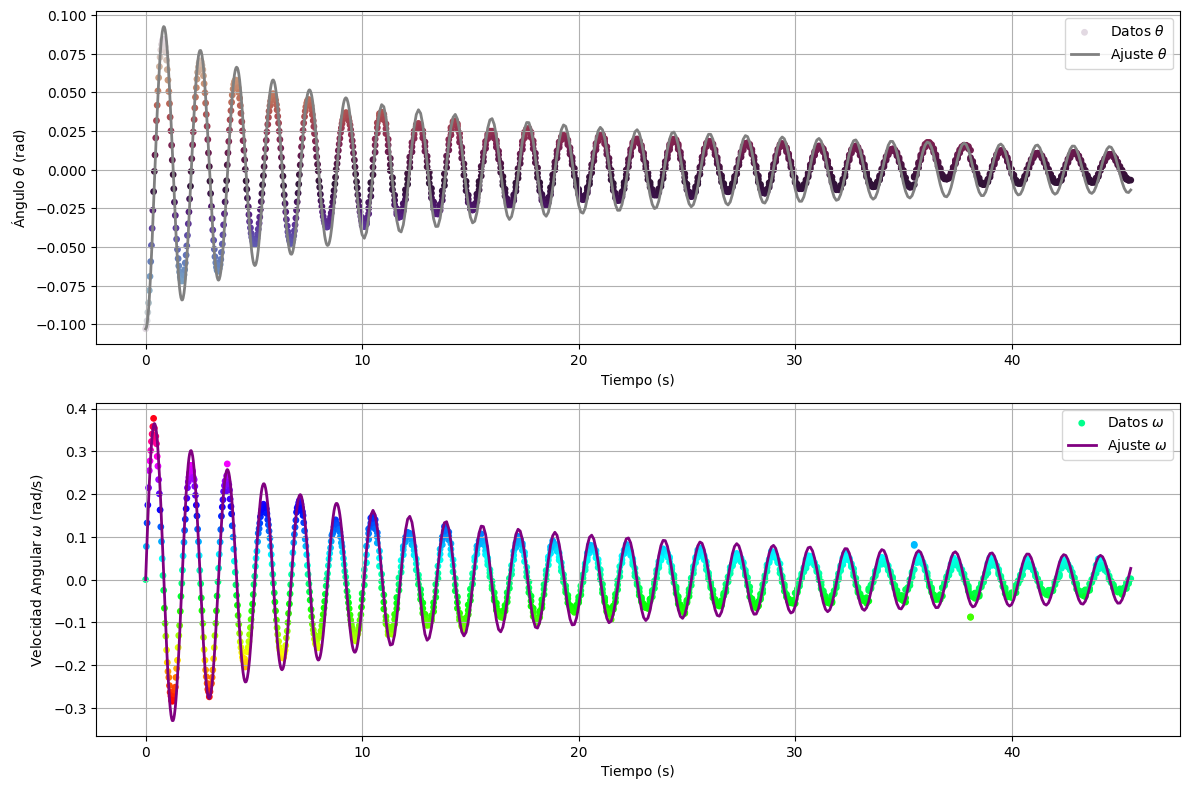

In [13]:
time_data = np.array(agua['t3'])
theta_data = np.array(agua['theta3'])
omega_data = np.array(agua['omega3'])

guess = [0.8, 0.7]  
result = minimize(ECS, guess, bounds=[(0, 10), (0.1, 10)])  
gamma_opt, L_opt = result.x  

print(f"Parámetros óptimos: gamma = {gamma_opt}, L = {L_opt}")

y0 = [theta_data[0], omega_data[0]]
solution_opt = odeint(model, y0, time_data, args=(gamma_opt, L_opt))


plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.scatter(time_data, theta_data, c=theta_data, cmap='twilight', label='Datos $\\theta$', s=15)
plt.plot(time_data, solution_opt[:, 0], color='gray', label='Ajuste $\\theta$', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo $\\theta$ (rad)')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.scatter(time_data, omega_data, c=omega_data, cmap='hsv', label='Datos $\\omega$', s=15)
plt.plot(time_data, solution_opt[:, 1], color='purple', label='Ajuste $\\omega$', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular $\\omega$ (rad/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
